In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018-2023.csv')
df.head()

,Unnamed: 0,COLLISION_ID,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING CATEGORY V1,CONTRIBUTING CATEGORY V2
0,1,3820945,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.91825,1,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,Moving Violation,Moving Violation
1,12,3821048,2018-01-01 00:48:00,BROOKLYN,11203,40.639260,-73.93777,0,0,Traffic Control Device Improper/Non-Working,Traffic Control Device Improper/Non-Working,Road Conditions,Road Conditions
2,21,3819375,2018-01-01 01:30:00,QUEENS,11101,40.740913,-73.95226,0,0,Following Too Closely,Following Too Closely,Moving Violation,Moving Violation
3,25,3821031,2018-01-01 01:55:00,BROOKLYN,11226,40.652412,-73.95396,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Driver Error,Driver Error
4,31,3820976,2018-01-01 02:29:00,QUEENS,11418,40.694690,-73.83505,2,0,Other Vehicular,Following Too Closely,Third-Party (Vehicular),Moving Violation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31896 entries, 0 to 31895
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     31896 non-null  int64  
 1   COLLISION_ID                   31896 non-null  int64  
 2   CRASH DATE TIME                31896 non-null  object 
 3   BOROUGH                        31896 non-null  object 
 4   ZIP CODE                       31896 non-null  int64  
 5   LATITUDE                       31896 non-null  float64
 6   LONGITUDE                      31896 non-null  float64
 7   NUMBER OF PERSONS INJURED      31896 non-null  int64  
 8   NUMBER OF PERSONS KILLED       31896 non-null  int64  
 9   CONTRIBUTING FACTOR VEHICLE 1  31896 non-null  object 
 10  CONTRIBUTING FACTOR VEHICLE 2  31896 non-null  object 
 11  CONTRIBUTING CATEGORY V1       31896 non-null  object 
 12  CONTRIBUTING CATEGORY V2       31896 non-null 

In [4]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

#### Changing DateTime Index

In [5]:
#Set to datetime index
#df.set_index('CRASH DATE TIME', inplace=True)

In [6]:
#Review the contributing factors
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(sort=True).head()

Driver Inattention/Distraction    12842
Other Vehicular                    3463
Failure to Yield Right-of-Way      2664
Passing or Lane Usage Improper     2049
Passing Too Closely                1328
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

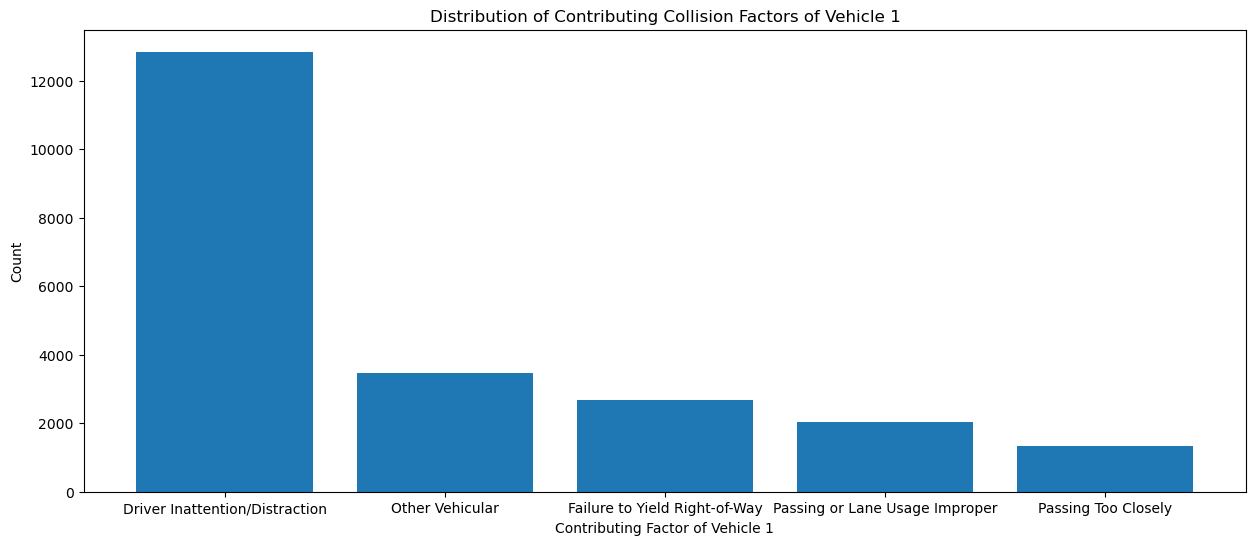

In [7]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
causes_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5]

# Plot bar chart 
ax.bar(causes_counts.index, causes_counts.values)

# Customize appearance
ax.set_xlabel('Contributing Factor of Vehicle 1');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Factors of Vehicle 1');

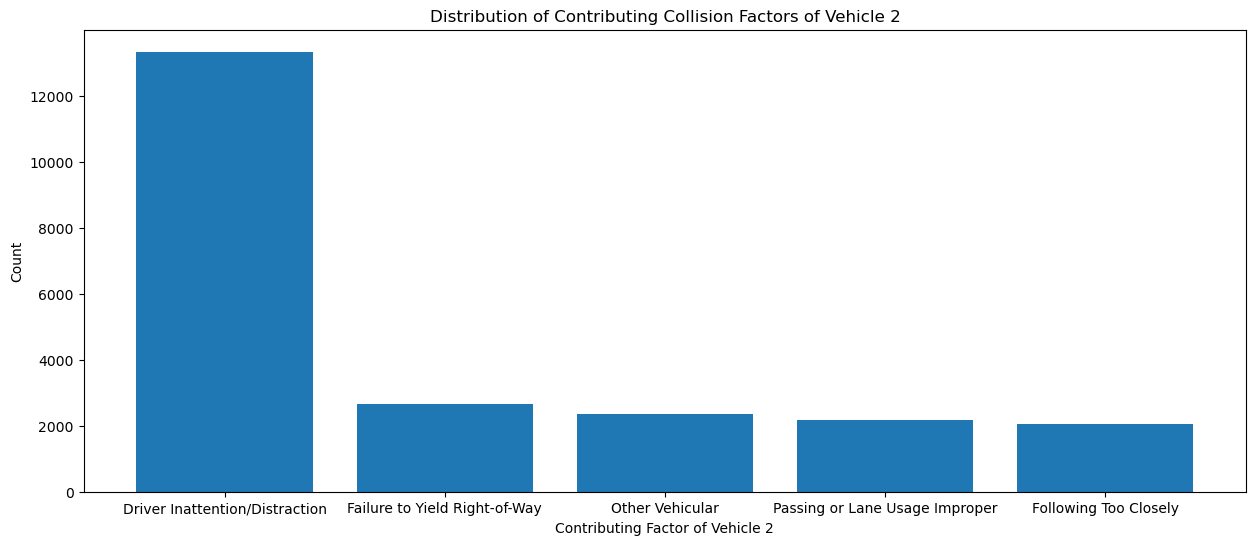

In [8]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
causes_counts2 = df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[:5]

# Plot bar chart 
ax.bar(causes_counts2.index, causes_counts2.values)

# Customize appearance
ax.set_xlabel('Contributing Factor of Vehicle 2');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Factors of Vehicle 2');

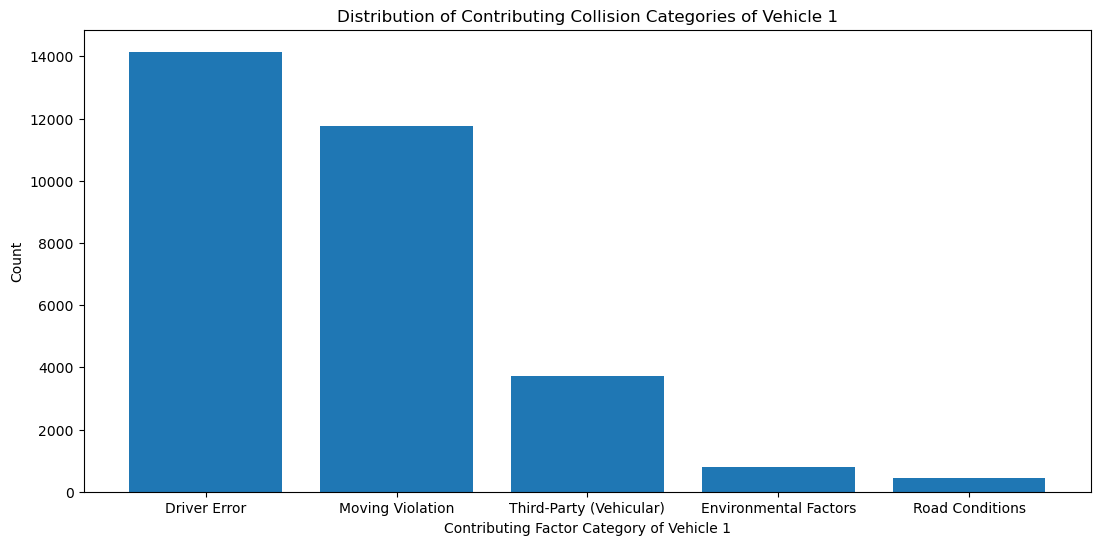

In [9]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(13,6))

# Create variable for easier reuse
category_counts = df['CONTRIBUTING CATEGORY V1'].value_counts()[:5]

# Plot bar chart 
ax.bar(category_counts.index, category_counts.values)

# Customize appearance
ax.set_xlabel('Contributing Factor Category of Vehicle 1');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Categories of Vehicle 1');

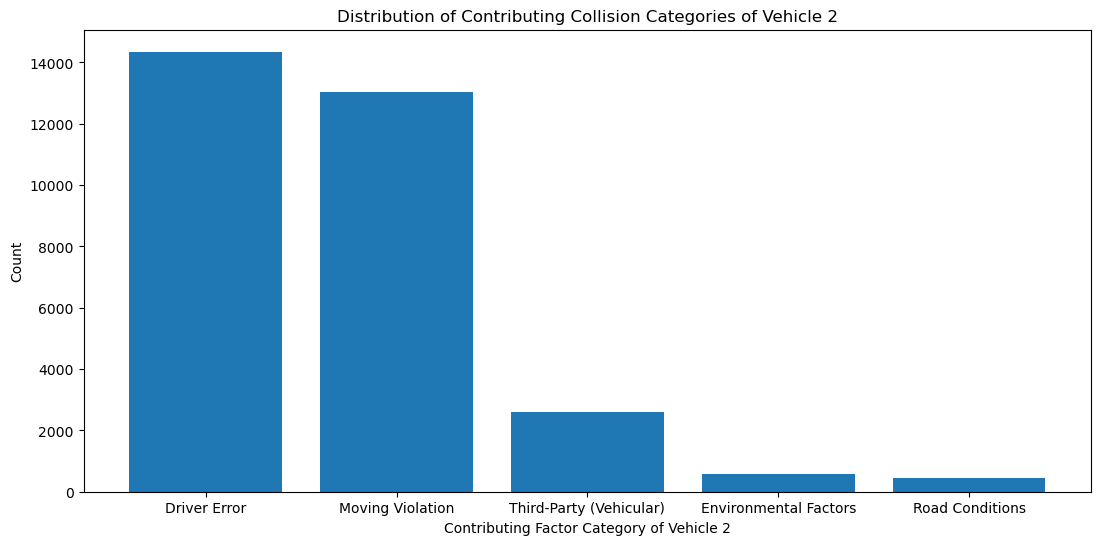

In [10]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(13,6))

# Create variable for easier reuse
category_counts2 = df['CONTRIBUTING CATEGORY V2'].value_counts()[:5]

# Plot bar chart 
ax.bar(category_counts2.index, category_counts2.values)

# Customize appearance
ax.set_xlabel('Contributing Factor Category of Vehicle 2');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Categories of Vehicle 2');

In [11]:
years_status = df['CONTRIBUTING CATEGORY V1']
years_status

0               Moving Violation
1                Road Conditions
2               Moving Violation
3                   Driver Error
4        Third-Party (Vehicular)
                  ...           
31891               Driver Error
31892           Moving Violation
31893         Other Distractions
31894           Moving Violation
31895    Third-Party (Vehicular)
Name: CONTRIBUTING CATEGORY V1, Length: 31896, dtype: object

In [12]:
years_status_dum = pd.get_dummies(years_status, columns=['status_group'])
years_status_dum

,Bodily Impairment,Driver Error,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
31891,0,1,0,0,0,0,0,0,0,0
31892,0,0,0,0,1,0,0,0,0,0
31893,0,0,0,0,0,1,0,0,0,0
31894,0,0,0,0,1,0,0,0,0,0


In [13]:
df

,Unnamed: 0,COLLISION_ID,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING CATEGORY V1,CONTRIBUTING CATEGORY V2
0,1,3820945,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.918250,1,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,Moving Violation,Moving Violation
1,12,3821048,2018-01-01 00:48:00,BROOKLYN,11203,40.639260,-73.937770,0,0,Traffic Control Device Improper/Non-Working,Traffic Control Device Improper/Non-Working,Road Conditions,Road Conditions
2,21,3819375,2018-01-01 01:30:00,QUEENS,11101,40.740913,-73.952260,0,0,Following Too Closely,Following Too Closely,Moving Violation,Moving Violation
3,25,3821031,2018-01-01 01:55:00,BROOKLYN,11226,40.652412,-73.953960,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Driver Error,Driver Error
4,31,3820976,2018-01-01 02:29:00,QUEENS,11418,40.694690,-73.835050,2,0,Other Vehicular,Following Too Closely,Third-Party (Vehicular),Moving Violation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31891,305624,4594589,2023-01-01 10:15:00,BROOKLYN,11207,40.678160,-73.897484,0,0,Driver Inattention/Distraction,Driver Inexperience,Driver Error,Driver Error
31892,305644,4594583,2023-01-01 14:53:00,BROOKLYN,11208,40.660797,-73.871830,2,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Moving Violation,Moving Violation
31893,305666,4594645,2023-01-01 19:26:00,QUEENS,11434,40.689915,-73.777900,1,0,Passenger Distraction,Driver Inattention/Distraction,Other Distractions,Driver Error
31894,305670,4594571,2023-01-01 20:45:00,BROOKLYN,11209,40.622860,-74.025350,5,0,Unsafe Speed,Failure to Yield Right-of-Way,Moving Violation,Moving Violation


In [14]:
#df.rename(columns = {'CRASH DATE TIME':'DATETIME'}, inplace = True)
#df

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31896 entries, 0 to 31895
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     31896 non-null  int64         
 1   COLLISION_ID                   31896 non-null  int64         
 2   CRASH DATE TIME                31896 non-null  datetime64[ns]
 3   BOROUGH                        31896 non-null  object        
 4   ZIP CODE                       31896 non-null  int64         
 5   LATITUDE                       31896 non-null  float64       
 6   LONGITUDE                      31896 non-null  float64       
 7   NUMBER OF PERSONS INJURED      31896 non-null  int64         
 8   NUMBER OF PERSONS KILLED       31896 non-null  int64         
 9   CONTRIBUTING FACTOR VEHICLE 1  31896 non-null  object        
 10  CONTRIBUTING FACTOR VEHICLE 2  31896 non-null  object        
 11  CONTRIBUTING CA

In [16]:
#calculate sum of sales grouped by day
#df.groupby(df.DATETIME.dt.day)['CONTRIBUTING FACTOR VEHICLE 1'].sum()


AttributeError: 'DataFrame' object has no attribute 'DATETIME'

In [17]:
# group the values by day and count the number of instances of each value
result = df.groupby([df['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

# print the result
print(result)

     CRASH DATE TIME CONTRIBUTING CATEGORY V1  count
0         2018-01-01             Driver Error      9
1         2018-01-01    Environmental Factors      1
2         2018-01-01         Moving Violation      9
3         2018-01-01          Road Conditions      1
4         2018-01-01  Third-Party (Vehicular)      3
...              ...                      ...    ...
6935      2023-01-01        Bodily Impairment      1
6936      2023-01-01             Driver Error      1
6937      2023-01-01         Moving Violation      3
6938      2023-01-01       Other Distractions      1
6939      2023-01-01  Third-Party (Vehicular)      1

[6940 rows x 3 columns]


In [19]:
#Change to a dataframe
daily_factorscat = pd.DataFrame(result)

#changing the index
daily_factorscat.set_index('CRASH DATE TIME', inplace=True)#changing the index

daily_factorscat

,CRASH DATE TIME,CONTRIBUTING CATEGORY V1,count
0,2018-01-01,Driver Error,9
1,2018-01-01,Environmental Factors,1
2,2018-01-01,Moving Violation,9
3,2018-01-01,Road Conditions,1
4,2018-01-01,Third-Party (Vehicular),3
...,...,...,...
6935,2023-01-01,Bodily Impairment,1
6936,2023-01-01,Driver Error,1
6937,2023-01-01,Moving Violation,3
6938,2023-01-01,Other Distractions,1


In [ ]:
# create a pivot table to reshape the data for plotting
pivot_table = result.pivot(index='DATETIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

# create a bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True)

# display the chart
plt.show()

In [ ]:
# Create variable for easier reuse
category_counts2 = df['CONTRIBUTING CATEGORY V2'].value_counts()[:5]

# Plot bar chart 
ax.bar(category_counts2.index, category_counts2.values)

<AxesSubplot:xlabel='CRASH DATE TIME'>

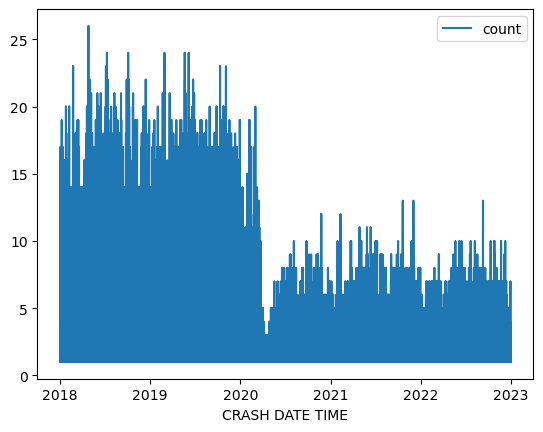

In [22]:
daily_factorscat.plot()

ValueError: cannot set using a list-like indexer with a different length than the value

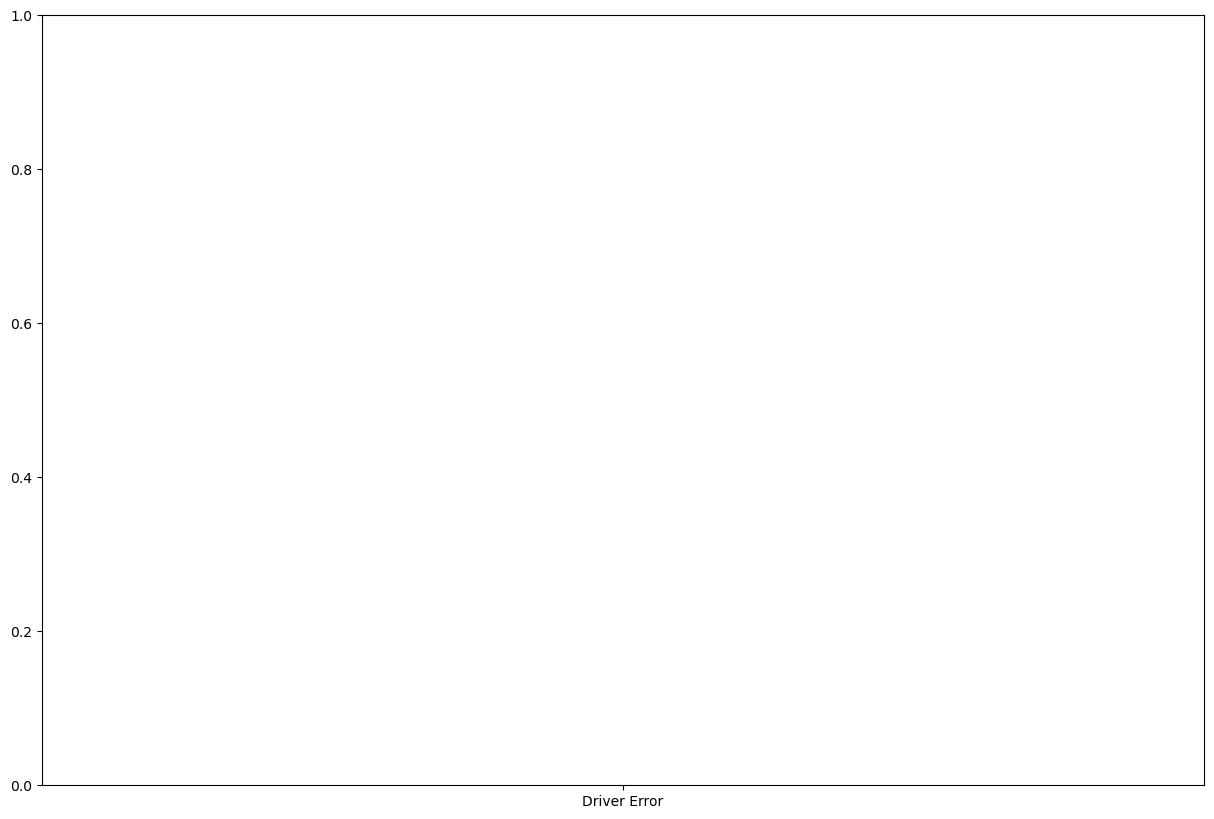

In [28]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker

sns.histplot(daily_factorscat, x="CONTRIBUTING CATEGORY V1", hue="CONTRIBUTING CATEGORY V1", multiple="stack")
#plt.legend(loc='upper left', labels=['In Seattle', 'Out of Seattle'], fontsize = 13)
ax.set_xlabel('Average Price', fontsize = 20)
ax.set_ylabel('Count of Homes', fontsize = 20)
ax.set_title('Average Price of Housing within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='x');

In [26]:
pivot_table = result.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
pivot_table

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Error,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018-01-01,0.0,9.0,1.0,0.0,9.0,0.0,1.0,0.0,3.0,0.0
2018-01-02,0.0,15.0,2.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0
2018-01-03,0.0,17.0,1.0,0.0,11.0,1.0,0.0,0.0,2.0,0.0
2018-01-04,1.0,5.0,0.0,0.0,4.0,0.0,8.0,0.0,2.0,0.0
2018-01-05,0.0,10.0,2.0,0.0,16.0,0.0,7.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-28,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2022-12-29,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0
2022-12-30,0.0,7.0,1.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0


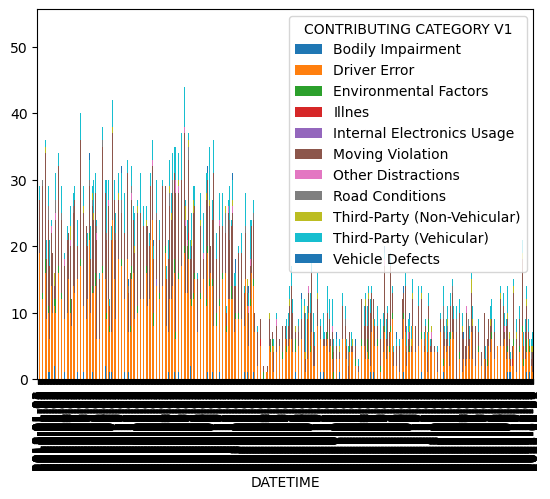

In [45]:
fig, (ax) = plt.subplots(figsize=(13,6))

# create a pivot table to reshape the data for plotting
pivot_table = result.pivot(index='DATETIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

# create a bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True)

# display the chart
plt.show()

In [46]:
#Check the unique values of contributing factors for vehicle 1
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Failure to Yield Right-of-Way',
       'Traffic Control Device Improper/Non-Working',
       'Following Too Closely', 'Driver Inattention/Distraction',
       'Other Vehicular', 'Driver Inexperience',
       'View Obstructed/Limited', 'Passing or Lane Usage Improper',
       'Backing Unsafely', 'Turning Improperly', 'Unsafe Speed', 'Glare',
       'Passing Too Closely', 'Oversized Vehicle',
       'Aggressive Driving/Road Rage', 'Unsafe Lane Changing',
       'Outside Car Distraction', 'Traffic Control Disregarded',
       'Pavement Slippery', 'Alcohol Involvement',
       'Reaction to Uninvolved Vehicle', 'Driverless/Runaway Vehicle',
       'Obstruction/Debris',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Tire Failure/Inadequate', 'Pavement Defective',
       'Lane Marking Improper/Inadequate', 'Headlights Defective',
       'Steering Failure', 'Illness', 'Passenger Distraction',
       'Failure to Keep Right', 'Brakes Defective', 'Drugs (illegal)'

In [65]:
df['CONTRIBUTING CATEGORY V1'].unique()

array(['Moving Violation', 'Road Conditions', 'Driver Error',
       'Third-Party (Vehicular)', 'Environmental Factors',
       'Other Distractions', 'Bodily Impairment',
       'Third-Party (Non-Vehicular)', 'Vehicle Defects',
       'Internal Electronics Usage'], dtype=object)

In [ ]:
#Create dataset with only construction_year and status_group
years_status = df['CONTRIBUTING CATEGORY V1']

#Dummy the status_group
years_status_dum = pd.get_dummies(years_status, columns=['status_group'])

#Group the sum of the status group dummies by construction year 
year_max = years_status_dum.groupby('construction_year').sum()


fig, ax = plt.subplots(figsize=(17,8))
ax = sns.lineplot(data=year_max, x='construction_year', y='status_group_functional', palette='bright')

fig.suptitle('Construction Year of Wells (Excluding 0 Year)', fontsize=18)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Number of Wells', fontsize=14)
#plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();
